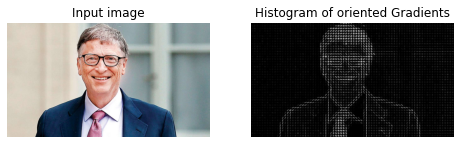

(720, 1280, 3)

In [14]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2

#read image from disk
image = cv2.imread('C:\\Users\\hp\\Desktop\\billgates.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#fd is a feature descriptor
fd, hog_image = hog(image, orientations = 8, pixels_per_cell = (16,16), cells_per_block=(1,1), visualize = True, multichannel = True)

#plot input and hog image
fig, (ax1, ax2)= plt.subplots(1,2,figsize= (8,4), sharex = True, sharey = True)
ax1.axis('off')
ax1.imshow(image, cmap= plt.cm.gray)
ax1.set_title('Input image')

#rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range= (0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, Cmap = plt.cm.gray)
ax2.set_title('Histogram of oriented Gradients')
plt.show()

len(fd)
image.shape

# face detection

found3 face(s) in input image.
A face is located at pixel location Top: 5,Left: 38,Bottom: 79, Right: 113
A face is located at pixel location Top: 96,Left: 38,Bottom: 171, Right: 113
A face is located at pixel location Top: 204,Left: 47,Bottom: 275, Right: 121


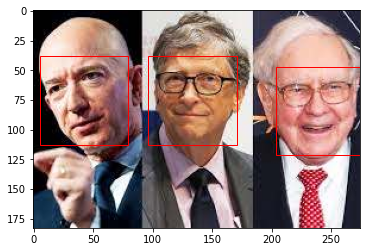

In [3]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline 

#load the jpg file into a numpy array
image = cv2.imread('C:\\Users\\hp\\Desktop\\oneframe.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


#find all the faces in the image
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("found{} face(s) in input image.".format(number_of_faces))

#get axis handle
plt.imshow(image)
ax = plt.gca()

#repeat for all faces found
for face_location in face_locations :
    #print the location of each face in this image
    top, right, bottom, left = face_location
    x, y, w, h = left, top, right, bottom
    print("A face is located at pixel location Top: {},Left: {},Bottom: {}, Right: {}".format(x,y,w,h))
    #let's draw a box around the face
    rect = Rectangle((x,y), w-x, h-y, fill= False ,color= 'red')
    ax.add_patch(rect)

#show output image
plt.show()



# Face recognition

found1 face(s) in input image.
A face is located at pixel location Top: 295,Left: 418,Bottom: 849, Right: 973


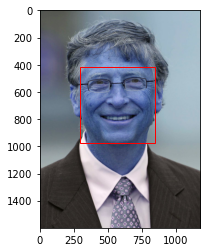

Euclidean distance: 0.4160956086694703
Euclidean distance: 0.8654690980957827
Euclidean distance: 0.763144813457981
Found Bill Gates in the photo!


In [26]:
import face_recognition 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import cv2
%matplotlib inline

#load the known images(create a database)
image = cv2.imread('C:\\Users\\hp\\Desktop\\billgates.jpg')
gates = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('C:\\Users\\hp\\Desktop\\jeffbezos.jpg')
bezos = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('C:\\Users\\hp\\Desktop\\elon musk.jpg')
musk = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('C:\\Users\\hp\\Desktop\\warrenbuffet.jpg')
buffet = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#get the face encoding of each person.this can fall if no one is found in the photo.
gates_encoding = face_recognition.face_encodings(gates)[0]
bezos_encoding = face_recognition.face_encodings(bezos)[0]
musk_encoding = face_recognition.face_encodings(musk)[0]

#create a database of all known face encodings
known_face_encodings = [gates_encoding, bezos_encoding, musk_encoding ]

#load the image we want to check
image = cv2.imread('C:\\Users\\hp\\Desktop\\Bill-Gates-2011.jpg')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

#find all the faces in the image
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("found{} face(s) in input image.".format(number_of_faces))

#get axis handle
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations :
    #print the location of each face in this image
    top, right, bottom, left = face_location
    x, y, w, h = left, top, right, bottom
    print("A face is located at pixel location Top: {},Left: {},Bottom: {}, Right: {}".format(x,y,w,h))
    #let's draw a box around the face
    rect = Rectangle((x,y), w-x, h-y, fill= False ,color= 'red')
    ax.add_patch(rect)

#show output image
plt.show()

#get face encodings for any people in the picture
unknown_face_encodings = face_recognition.face_encodings(unknown_image)

from scipy.spatial import distance 
    
# there might be more than one person in the photo ,so we need to loop over each face we found
for unknown_face_encoding in unknown_face_encodings :
    results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance = 0.6)
    
    results = []
    for known_face_encoding in known_face_encodings:
        d = distance.euclidean(known_face_encoding, unknown_face_encoding)
        print("Euclidean distance:",d)
        results.append(d)
    threshold = 0.6
    results = np.array(results)<= threshold
    
    name = 'unknown'
    
    if results[0]:
        name = 'Bill Gates'
        
    elif results[1]:
        name = 'Jeff Bezos'
     
    elif results[2]:
        name = 'Elon Musk'
        
print(f"Found {name} in the photo!")    
